In [25]:
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import pickle
import pandas as pd

from optimizers import DiscreteStateOptimizer


In [26]:
device = torch.device("cuda")

In [27]:


def load_data(file_path, column, rows=None):
    """Generic function to load data from an Excel file."""
    df = pd.read_excel(file_path)
    return list(df[column][rows]) if rows else list(df[column])

POTENTIATION_DATASETS = {
    "pradeep": ("data/data_P_D_pradeep_sachan.xlsx", "potentiation (mS)", range(30)),
    "vivek": ("data/new_data_50_pulses.xlsx", "Potentiation", None),
    "himanshu": ("data/himanshu_data_128_cycles.xlsx", "Conductance", range(128))
}
DEPRESSION_DATASETS = {
    "pradeep": ("data/data_P_D_pradeep_sachan.xlsx", "depression (mS)", range(30, 60)),
    "vivek": ("data/new_data_50_pulses.xlsx", "Depression", None),
    "himanshu": ("data/himanshu_data_128_cycles.xlsx", "Conductance", range(128, 256))
}
# Select potentiation data
data_choice = "vivek" 

potentiation_conductances = load_data(*POTENTIATION_DATASETS.get(data_choice, (None, None, None)))
depression_conductances = load_data(*DEPRESSION_DATASETS.get(data_choice, (None, None, None)))



In [28]:
import torch

def map_to_nearest_indices(given_list, reference_list):
    given_tensor = torch.tensor(given_list, dtype=torch.float32)
    reference_tensor = torch.tensor(reference_list, dtype=torch.float32)
    
    # Compute absolute differences and find nearest indices
    indices = torch.abs(reference_tensor.unsqueeze(0) - given_tensor.unsqueeze(-1)).argmin(dim=-1)
    
    return indices.tolist()

# Example usage
given_list = [3.2, 7.8, 1.5]
reference_list = [1.0, 2.0, 3.0, 5.0, 8.0]
mapping = map_to_nearest_indices(given_list, reference_list)
print(mapping)  # Output: Indices in reference_list that are closest to values in given_list


[2, 4, 0]


In [29]:
potentiation_to_depression_mapping = map_to_nearest_indices(potentiation_conductances, depression_conductances)
depression_to_potentiation_mapping = map_to_nearest_indices(depression_conductances, potentiation_conductances)


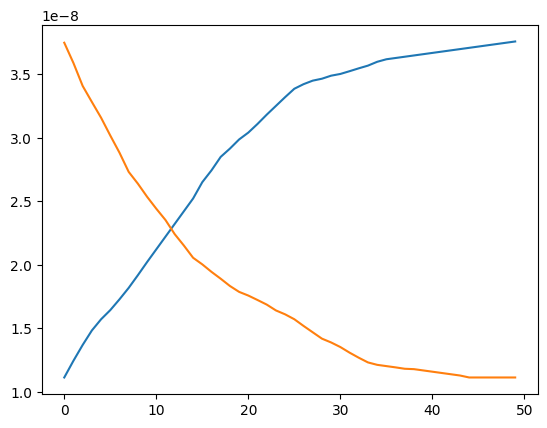

In [31]:
plt.plot(potentiation_conductances)
plt.plot(depression_conductances)

In [30]:
potentiation_to_depression_mapping

[44,
 33,
 30,
 27,
 25,
 23,
 21,
 18,
 16,
 15,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 6,
 5,
 5,
 4,
 4,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]